In [1]:
import pandas as pd

# Define a function to read CSV files with a specific date format
def read_csv_with_date_format(filepath, date_format):
    return pd.read_csv(filepath, parse_dates=True, index_col=0, date_parser=lambda x: pd.to_datetime(x, format=date_format))

In [2]:
# Specify the date format used in the CSV files
date_format = "%d/%m/%Y"

# List of CSV file paths containing real estate trend data
estate_trends = ["mortgage_interest_rates.csv", "house_vacancy_rate.csv", "cpi_housing_data.csv"]

# Read each CSV file into a DataFrame and store them in a list
dfs = [read_csv_with_date_format(f, date_format) for f in estate_trends]

# Concatenate all DataFrames along the columns (axis=1)
estate_trends = pd.concat(dfs, axis=1)

In [3]:
# Forward fill missing values to handle missing data
estate_trends = estate_trends.ffill()

# Drop any remaining rows with missing values
estate_trends = estate_trends.dropna()

# Display the final DataFrame
estate_trends

,MORTGAGE INTEREST,VACANCY RATE,CPI
DATE,,,
2014-03-01,6.01,6.2,102.3
2014-03-02,3.98,6.2,102.3
2014-03-03,4.81,6.2,102.3
2014-03-04,4.64,6.2,102.3
2014-03-05,6.33,6.2,102.3
...,...,...,...
2024-02-26,6.96,4.8,123.5
2024-02-27,5.18,4.8,123.5
2024-02-28,7.06,4.8,123.5


In [4]:
# Read the house trends data
house_trends_data = pd.read_csv('XX_House_Trend_Data.csv', parse_dates=True, index_col=0, dayfirst=True)

# Display the house_trends_data DataFrame
house_trends_data

,Median House Price,Median Sales Price
Date,,
2014-03-02,400780.79,359101.73
2014-03-09,382637.40,373089.34
2014-03-16,393631.15,392159.58
2014-03-23,414878.51,377300.91
2014-03-30,411593.52,406786.76
...,...,...
2024-01-28,1586914.43,1445401.06
2024-02-04,1577774.08,1499182.04
2024-02-11,1601964.95,1480777.03


In [5]:
# Merge the dataframes
merged_dfs = estate_trends.merge(house_trends_data, left_index=True, right_index=True, how='inner')

# Rename columns appropriately
merged_dfs.columns = ["Mortgage Interest", "Vacancy Rate", "CPI", "Median Sales Price", "Median House Price"]

In [6]:
# Reset index to move Date from index to a column
merged_dfs.reset_index(inplace=True)

# Rename the index column to "Date"
merged_dfs.rename(columns={'index': 'Date'}, inplace=True)

merged_dfs

,Date,Mortgage Interest,Vacancy Rate,CPI,Median Sales Price,Median House Price
0,2014-03-02,3.98,6.2,102.3,400780.79,359101.73
1,2014-03-09,5.29,6.2,102.3,382637.40,373089.34
2,2014-03-16,5.70,6.2,102.4,393631.15,392159.58
3,2014-03-23,5.02,6.2,102.4,414878.51,377300.91
4,2014-03-30,5.89,6.2,102.5,411593.52,406786.76
...,...,...,...,...,...,...
517,2024-01-28,4.84,4.8,123.3,1586914.43,1445401.06
518,2024-02-04,4.56,4.8,123.3,1577774.08,1499182.04
519,2024-02-11,4.87,4.8,123.4,1601964.95,1480777.03
520,2024-02-18,6.75,4.8,123.4,1574800.88,1487473.44


<AxesSubplot: >

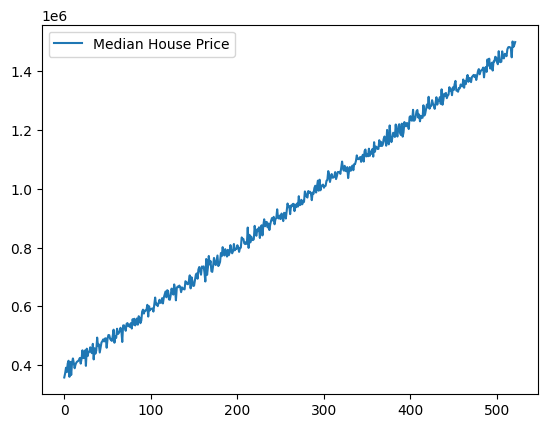

In [7]:
merged_dfs["adj_price"] = merged_dfs["Median Sales Price"] / merged_dfs["CPI"] * 100
merged_dfs["adj_value"] = merged_dfs["Median House Price"] / merged_dfs["CPI"] * 100
merged_dfs.plot.line(y="Median House Price", use_index=True)

In [8]:
merged_dfs["next_quarter"] = merged_dfs["adj_price"].shift(-13)

In [9]:
merged_dfs.dropna(inplace=True)

merged_dfs["change"] = (merged_dfs["next_quarter"] > merged_dfs["adj_price"]).astype(int)

merged_dfs

,Date,Mortgage Interest,Vacancy Rate,CPI,Median Sales Price,Median House Price,adj_price,adj_value,next_quarter,change
0,2014-03-02,3.98,6.2,102.3,400780.79,359101.73,3.917701e+05,3.510281e+05,3.951757e+05,1
1,2014-03-09,5.29,6.2,102.3,382637.40,373089.34,3.740346e+05,3.647012e+05,4.017381e+05,1
2,2014-03-16,5.70,6.2,102.4,393631.15,392159.58,3.844054e+05,3.829683e+05,4.023816e+05,1
3,2014-03-23,5.02,6.2,102.4,414878.51,377300.91,4.051548e+05,3.684579e+05,4.211377e+05,1
4,2014-03-30,5.89,6.2,102.5,411593.52,406786.76,4.015547e+05,3.968651e+05,3.986391e+05,0
...,...,...,...,...,...,...,...,...,...,...
504,2023-10-29,5.40,4.6,122.8,1535887.59,1429005.73,1.250723e+06,1.163685e+06,1.287035e+06,1
505,2023-11-05,6.41,4.6,122.8,1534695.36,1430519.66,1.249752e+06,1.164918e+06,1.279622e+06,1
506,2023-11-12,6.22,4.6,122.9,1521239.91,1465655.99,1.237787e+06,1.192560e+06,1.298189e+06,1
507,2023-11-19,5.92,4.6,122.9,1524527.95,1443216.81,1.240462e+06,1.174302e+06,1.276176e+06,1


In [10]:
# Save the merged DataFrame to a CSV file
merged_dfs.to_csv("Merge_Economic_HouseTrend_Data.csv")

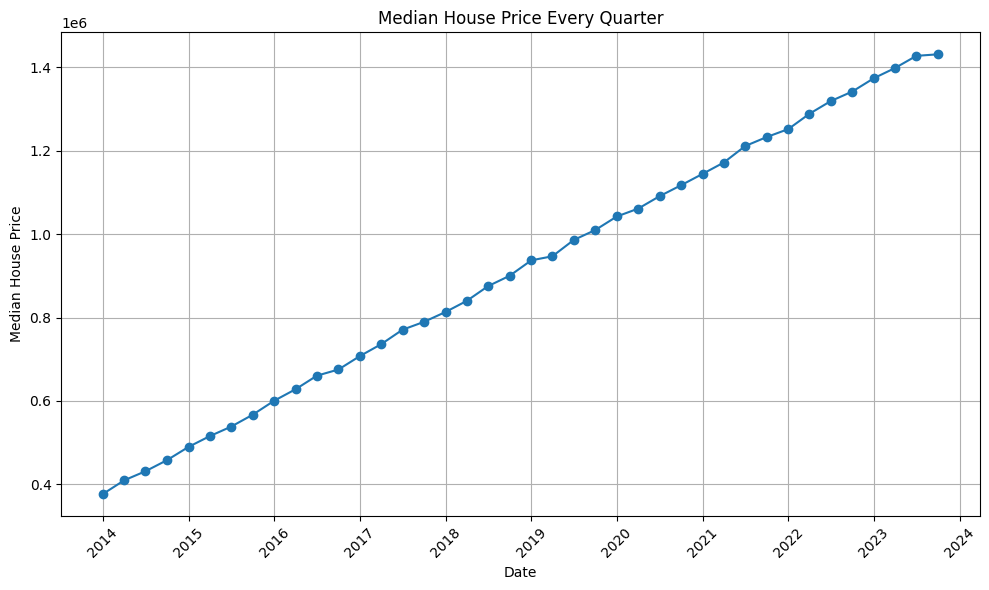

In [11]:
import matplotlib.pyplot as plt

# Convert Date column to datetime
merged_dfs['Date'] = pd.to_datetime(merged_dfs['Date'])

# Group by quarter and calculate median house price
merged_dfs['Quarter'] = merged_dfs['Date'].dt.to_period('Q')
quarterly_median = merged_dfs.groupby('Quarter')['Median House Price'].median()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(quarterly_median.index.to_timestamp(), quarterly_median.values, marker='o', linestyle='-')
plt.title('Median House Price Every Quarter')
plt.xlabel('Date')
plt.ylabel('Median House Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
quarterly_median

Quarter
2014Q1     377300.910
2014Q2     409850.000
2014Q3     431646.900
2014Q4     458261.720
2015Q1     490070.380
2015Q2     515715.740
2015Q3     538466.950
2015Q4     566983.130
2016Q1     600649.690
2016Q2     628110.340
2016Q3     660638.370
2016Q4     675438.480
2017Q1     707866.100
2017Q2     736059.970
2017Q3     770753.210
2017Q4     789677.995
2018Q1     813409.005
2018Q2     839901.590
2018Q3     875271.140
2018Q4     900103.940
2019Q1     937051.200
2019Q2     946737.650
2019Q3     985803.450
2019Q4    1009683.790
2020Q1    1042165.330
2020Q2    1060983.970
2020Q3    1090708.660
2020Q4    1117067.020
2021Q1    1144361.060
2021Q2    1171448.760
2021Q3    1210838.100
2021Q4    1232508.260
2022Q1    1251546.410
2022Q2    1288192.520
2022Q3    1318637.720
2022Q4    1341547.420
2023Q1    1373501.790
2023Q2    1397869.470
2023Q3    1427013.320
2023Q4    1430702.970
Freq: Q-DEC, Name: Median House Price, dtype: float64